In [5]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [15]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [17]:
img_array.shape

(48, 48, 3)

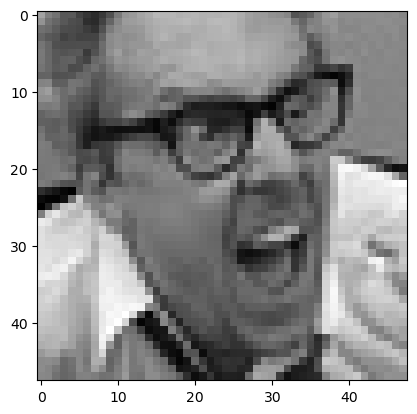

In [19]:
plt.imshow(img_array)

In [21]:
Datadirectory = "Training/"

In [23]:
Classes = ["0","1","2","3","4","5","6"]

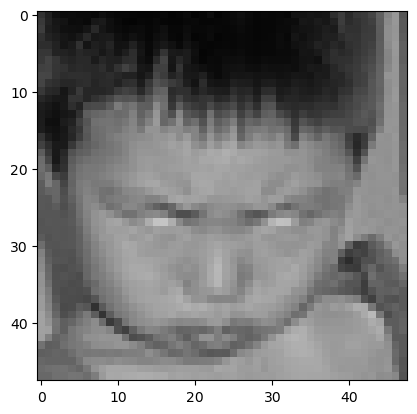

In [25]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

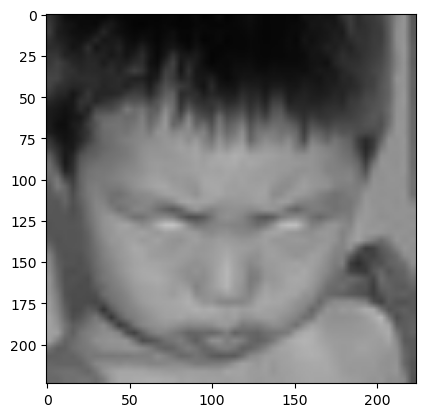

In [27]:
img_size= 224
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
new_array.shape

(224, 224, 3)

In [155]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [157]:
create_training_Data()

In [159]:
print(len(training_Data))

4624


In [161]:
import random
random.shuffle(training_Data)

In [163]:
x = []
y = []
for features,label in training_Data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)

In [165]:
x = x/255.0;

MemoryError: Unable to allocate 5.19 GiB for an array with shape (4624, 224, 224, 3) and data type float64

In [153]:
print(len(training_Data))

4624


In [169]:
Y = np.array(y)

In [171]:
Y.shape

(4624,)

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [79]:
model = tf.keras.applications.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [81]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [123]:
base_input = model.input

In [99]:
base_output = model.layers[-2].output

In [109]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [103]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)


In [105]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_165>

In [111]:
base_input

[]

In [125]:
new_model = keras.Model(inputs=base_input,outputs=final_output)

In [127]:
new_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [129]:
new_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [131]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [173]:
new_model.fit(x,Y, epochs=15)

Epoch 1/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 430s 3s/step - accuracy: 0.3502 - loss: 1.6938
Epoch 2/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.5239 - loss: 1.2940
Epoch 3/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.6064 - loss: 1.0802
Epoch 4/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.6565 - loss: 0.9475
Epoch 5/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.6701 - loss: 0.9202
Epoch 6/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.6920 - loss: 0.8526
Epoch 7/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.7498 - loss: 0.7118
Epoch 8/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.7749 - loss: 0.6407
Epoch 9/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.7977 - loss: 0.5747
Epoch 10/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.8155 - loss: 0.5226
Epoch 11/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.8438 - loss: 0.4451
Epoch 12/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 

In [179]:
new_model.save('Final_functional_5.h5')

In [181]:
new_model = tf.keras.models.load_model('Final_functional_5.h5')

In [183]:
frame = cv2.imread("happy.jpg")

In [185]:
frame.shape

(600, 600, 3)

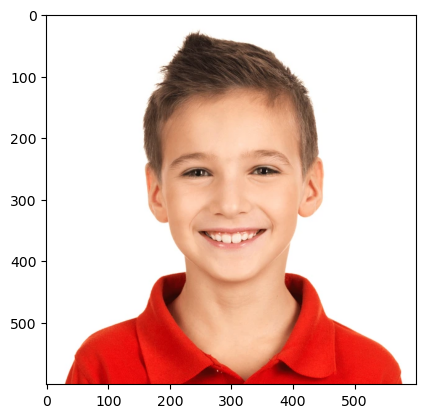

In [187]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [189]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [191]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [193]:
gray.shape

(600, 600)

In [195]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

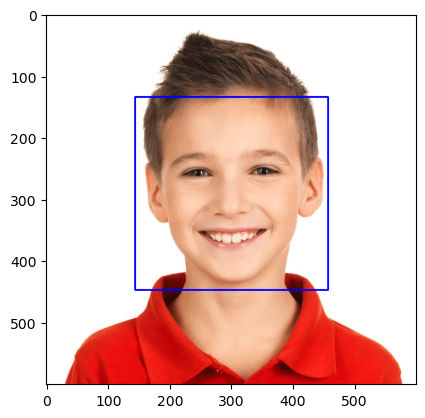

In [197]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

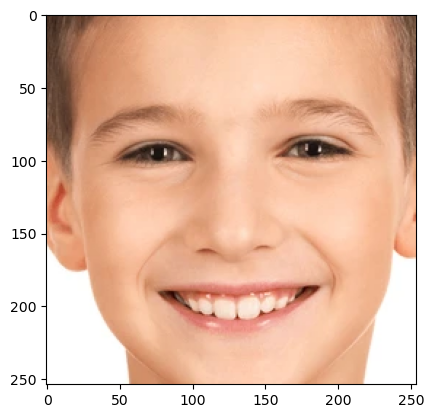

In [199]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [201]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [203]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [205]:
Predictions[0]

array([8.2615811e-01, 1.8127050e-04, 7.4323523e-04, 5.0600257e-04,
       1.6730072e-01, 4.9725897e-03, 1.3803624e-04], dtype=float32)

In [207]:
np.argmax(Predictions)

0

In [215]:
import cv2
import numpy as np
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale,thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x,text_offset_y),(text_offset_x+text_width+2, text_offset_y-text_height -2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr, cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap = cv2.VideoCapture(0)
#check if the webcam is opened correctly
if not cap.isOpened():
    print("Cannot open webcam")
    exit()


while True:
    ret ,frame = cap.read()
    if not ret:
        print("Failed to grab frame. Exiting...")
        break
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]
                
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions)==0):
        status = "Angry"

        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(Predictions)==1):
        status = "Disgust"

        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==2):
        status = "Fear"

        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==3):
        status = "Happy"

        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==4):
        status = "Neutral"

        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif (np.argmax(Predictions)==5):
        status = "Sad"

        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    else:
        status = "Surprice"
        
        x1,y1,w1,h1 = 0,0,175,175
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))


    cv2.imshow('Face Emotion Recognition',frame)
    key = cv2.waitKey(2)
    if key == ord('q') or cv2.getWindowProperty('Face Emotion Recognition', cv2.WND_PROP_VISIBLE) < 1:
        break

cap.release()
cv2.destroyAllWindows()


Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
